# Numerical Differentiation

## 1. Using implicit finite difference formula

### Example
#### Given a function $u(x)$ which we want to find its derivative with numerical methods.

#### Consider a uniform grid partitioning $x$ into $\{x_1, x_2, \dots, x_n\}$ with grid size $\Delta x=x_{j+1}-x_j, j\in \{1, 2, \dots, n\}$, and a set of corresponding data values $U=\{U_1, U_2, \dots, U_n\}$, where 
#### $$U_{j+k} = u(x_j + k \Delta x) = u(x_{j+k}), j\in \{1, 2, \dots, n\}.$$

#### We want to use one-sided finite-difference formula 

#### $$\alpha_1 U_j + \alpha_2 U_{j+1} + \alpha_3 U_{j+2}$$

#### to approximate the derivative of $u$ at all the points $x_j, j\in \{1, 2, \dots, n\}$, that is

#### $$u'(x_j) \approx W_j \triangleq \alpha_1 U_j + \alpha_2 U_{j+1} + \alpha_3 U_{j+2}.$$

### Part 1.
#### Find the coefficients $\alpha_j$ for $j=1,2,3$ which make the stencil above accurate for as high degree polynomials as possible.

---

Since by Taylor expansion, we have
$$\begin{aligned}
    u(x_j) &= u(x_j) \\
    u(x_j+\Delta x) &= u(x_j) + \Delta x u'(x_j) + \frac{(\Delta x)^2}{2}u''(x_j) + \dots\\
    u(x_j+2\Delta x) &= u(x_j) + 2\Delta xu'(x_j) + \frac{4(\Delta x)^2}{2}u''(x_j) + \dots\\
\end{aligned}$$ 

By the condition in the question,

$$\begin{aligned}
u'(x_j) &\approx W_j \triangleq  \alpha_1 U_j + \alpha_2 U_{j+1} + \alpha_3 U_{j+2}  \\
\implies u'(x_j) &\approx W_j \triangleq \alpha_1 u(x_j) + \alpha_2\, u(x_j+\Delta x) + \alpha_3\, u(x_j+2\Delta x)\\
\end{aligned}$$

By comparing coefficients, we have
$$\begin{cases} 
\alpha_1 + \alpha_2 + \alpha_3 = 0 \\ 
\alpha_2\Delta x + 2\alpha_3 \Delta x=1\\ 
{1\over2}\alpha_2(\Delta x)^2 + {1\over2}\alpha_3 4 (\Delta x)^2=0
\end{cases}$$

Solving the equations, and we can get
$$\begin{cases} 
\alpha_1 = {-3\over 2 \Delta x} \\ 
\alpha_2 = {2\over \Delta x}\\ 
\alpha_3 = {-1\over 2 \Delta x}
\end{cases}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags

In [1]:
alpha = [-3/2, 2, -1/2]

### Part 2.

#### Suppose we use the finite-difference formula above to approximate and assume the problem is periodic, i.e. take $U_0=U_n$, $U_1=U_{n+1}$, and so on. 

#### Find the differentiation matrix $D$ so that the numerical differentiation problem can be represented as a matrix-vector multiplication $W \triangleq DU$, where $D \in \mathbb{R}^{n \times n}$, $U \in \mathbb{R}^{n}$, and $W \in \mathbb{R}^n$.



In [3]:
def construct_differentiation_matrix(n, alpha, delta_x):
    ''' Construct
    Parameters
    ----------
    n : int
        number of partition
    alpha : tuple of length 3
       alpha = (𝛼1, 𝛼2, 𝛼3)
    delta_x : float
        mesh size
        
    Returns
    -------
    D : scipy.sparse.diags
    '''
    diagonals = [
        alpha[0] * np.ones(n),
        alpha[1] * np.ones(n-1),
        alpha[2] * np.ones(n-2),
        alpha[2] * np.ones(2),
        alpha[1] * np.ones(1)
    ]
    diagnoal_matrix = diags(diagonals, offsets=[0, 1, 2, -n+2, -n+1])
    diagnoal_matrix /= delta_x

    return diagnoal_matrix
    return D

In [4]:
print("For n = 8 and mesh size 1, D in dense form is")
sparse_D = construct_differentiation_matrix(8, alpha, 1)
dense_D = sparse_D.toarray()
print(dense_D)

For n = 8 and mesh size 1, D in dense form is
[[-1.5  2.  -0.5  0.   0.   0.   0.   0. ]
 [ 0.  -1.5  2.  -0.5  0.   0.   0.   0. ]
 [ 0.   0.  -1.5  2.  -0.5  0.   0.   0. ]
 [ 0.   0.   0.  -1.5  2.  -0.5  0.   0. ]
 [ 0.   0.   0.   0.  -1.5  2.  -0.5  0. ]
 [ 0.   0.   0.   0.   0.  -1.5  2.  -0.5]
 [-0.5  0.   0.   0.   0.   0.  -1.5  2. ]
 [ 2.  -0.5  0.   0.   0.   0.   0.  -1.5]]


### Part 3.


#### Take $u(x)=e^{\sin x}$ on the domain $[-\pi, \pi]$.  Find the finite difference approximation $W$ for $\{u'(x_j)\}^{n}_{j=1}$ for various values of $n=2^{k}$, $k=3,4,\dots,10$, and analyze the errors.

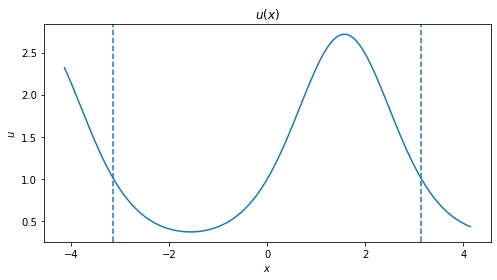

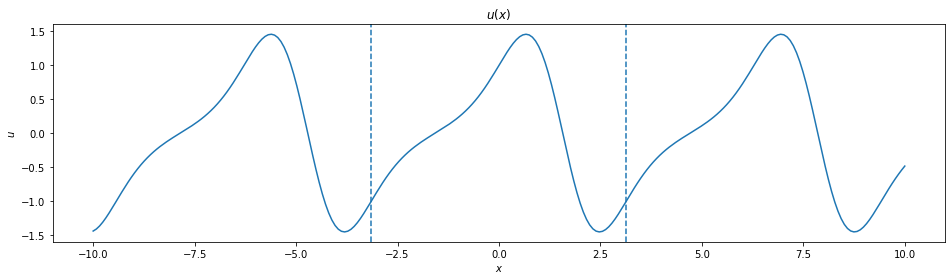

In [7]:
def u(x):
    return np.exp(np.sin(x))

def d_u(x):
    return np.exp(np.sin(x))*np.cos(x)

x_range = np.linspace(-np.pi-1, np.pi+1, 2**8)
plt.figure(figsize=(8, 4))
plt.plot(x_range, u(x_range))
plt.axvline(x=np.pi, linestyle='--')
plt.axvline(x=-np.pi, linestyle='--')
plt.ylabel(r'$u$')
plt.xlabel(r'$x$')
plt.title(r'$u(x)$')
plt.show()

x_range = np.linspace(-10, 10, 2**8)
plt.figure(figsize=(16, 4))
plt.plot(x_range, d_u(x_range))
plt.axvline(x=np.pi, linestyle='--')
plt.axvline(x=-np.pi, linestyle='--')
plt.ylabel(r'$u$')
plt.xlabel(r'$x$')
plt.title(r'$u(x)$')
plt.show()

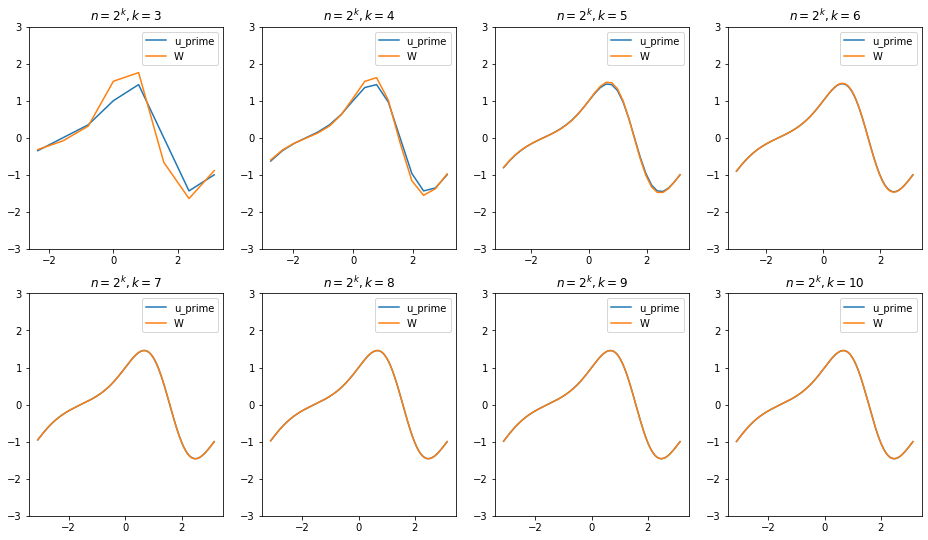

In [8]:
error_list = []
fig, axes = plt.subplots(2, 4, figsize=(16,9))
for idx, ax in enumerate(axes.flatten()): 
    '''Hints: 
    For each case in this for loop, you may follow the steps below
        1. Use idx to set k and n.
        2. Prepare n partition points of the domain.
        3. Construct D.
        4. Find u', U, and W. 
        5. Compute the error between u' and W.
        6. Append the error into error_list.
        7. Use ax to plot u', W with proper labels, title
        8. Enable legend to show the labels of curves.
        9. To make the plots more readable, set a consistent range of y-axis e.g. ax.set_ylim([-3, 3])
    '''

    k = idx + 3
    n = 2**k
    x = np.linspace(-np.pi,np.pi,n+1) 
    sparse_D = construct_differentiation_matrix(n, alpha, 2*np.pi/n)
    D = sparse_D.toarray()
    u_prime = d_u(x[1:])   
    U = u(x[1:])
    W = np.matmul(D, U)
    error = abs(u_prime - W)
    error_list.append(error)
    ax.plot(x[1:], u_prime, label='u_prime')
    ax.plot(x[1:], W, label='W')
    ax.set_title(label='$n=2^{k}, k=$'+str(k))
    ax.legend()
    ax.set_ylim([-3, 3])

### Error Analysis

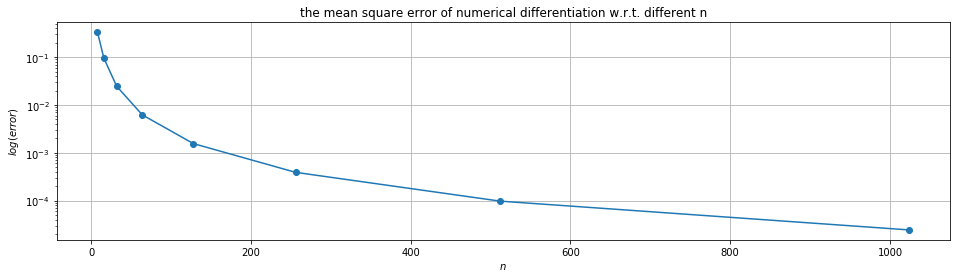

In [9]:
error_mse = []

for i in range(8):  #0~7
    square_list = np.square(error_list[i])
    mse = np.sqrt(sum(square_list)/(2**(i+3)))
    error_mse.append(mse)
    
fig, ax = plt.subplots(figsize=(16, 4))
n_list = [2**k for k in range(3,11)]  #[8, 16, 32, 64, 128, 256, 512, 1024]
ax.plot(n_list, error_mse, 'o-')
ax.set_title('the mean square error of numerical differentiation w.r.t. different n')
ax.grid(True)
ax.set_yscale('log') 
ax.set_ylabel(r'$log(error)$')
ax.set_xlabel(r'$n$')
plt.show()

## 2. Using Lagrange Interpolation Polynomial to Construct Differential Matrix

### Construct $D_1=D^{(1)}_{ij}=l_j'(x_i)=\begin{cases} {\lambda_j/\lambda_i\over x_i-x_j}, i\neq j \\ 
                                -\mathop{\sum_{j=0}^{n}}_{j\neq i} l_j'(x_i) , i=j \end{cases},$
 where
$$\lambda_j={1\over \mathop{\prod _{k=0}^n}_{k\neq j} \; (x_j-x_k)}$$

In [10]:
def Lambda(x,j):
    '''
    Arguments:
        x : a list with n+1 elements (x[0]~x[n])
        j : a number in 0,1,2,...,n

    Return:
        z : lambda_j
    '''
    n = len(x) - 1
    y = 1
    for k in range(n+1):
        if k != j:
            y *= (x[j] - x[k])
    z = 1/y
    
    return z


In [11]:
def construct_D1(x):
    '''
    Arguments:
        x : a list with n+1 elements (x[0]~x[n])

    Return:
        D1 : 1st derivative matrix
    '''
    n = len(x) - 1
    D1 = np.zeros((n+1, n+1))
    for i in range(n+1):
        for j in range(n+1):
            if i != j:
                D1[i,j] = Lambda(x,j)/(Lambda(x,i)*(x[i]-x[j]))
        D1[i,i] = -sum(D1[i,j] for j in range(n+1))  #因為D1[i,i]那格現在是0，所以加了沒差
    
    return D1

In [13]:
x = [1,2,3] 
D1 = construct_D1(x)
D1

array([[-1.5,  2. , -0.5],
       [-0.5, -0. ,  0.5],
       [ 0.5, -2. ,  1.5]])

### Construct $D_2=D^{(2)}_{ij}=l_j''(x_i)=\begin{cases} {-2\lambda_j/\lambda_i\over x_i-x_j}(\mathop{\sum_{k=0}^{n}}_{k\neq i} {\lambda_k/\lambda_i\over x_i-x_k}+{1\over x_i-x_j})=2D^{(1)}_{ij}(D^{(1)}_{ii}-{1\over x_i-x_j}), i\neq j \\ 
                                -\mathop{\sum_{j=0}^{n}}_{j\neq i} l_j''(x_i) , i=j \end{cases}$

In [12]:
def construct_D2(x,D1):
    '''
    Arguments:
        x : a list with n+1 elements (x[0]~x[n])
        D1 : 1st derivative matrix

    Return:
        D2 : 2nd derivative matrix
    '''
    n = len(x) - 1
    D2 = np.zeros((n+1, n+1))
    for i in range(n+1):
        for j in range(n+1):
            if i != j:
                D2[i,j] = 2*D1[i,j]*(D1[i,i]-1/(x[i]-x[j]))
        D2[i,i] = -sum(D2[i,j] for j in range(n+1))  #因為D2[i,i]那格現在是0，所以加了沒差
    
    return D2

In [14]:
x = [1,2,3] 
D1 = construct_D1(x)
D2 = construct_D2(x,D1)
D2

array([[ 1., -2.,  1.],
       [ 1., -2.,  1.],
       [ 1., -2.,  1.]])

### Check whether $D_2=D_1 D_1$
Not true in general

In [15]:
D1D1=D1@D1
print('D1:\n', D1)
print('D2:\n', D2)
print('D1*D1:\n', D1D1)
print('D2-D1*D1:\n', D2-D1D1)
print('D2=D1*D1?\n', D2==D1D1)

D1:
 [[-1.5  2.  -0.5]
 [-0.5 -0.   0.5]
 [ 0.5 -2.   1.5]]
D2:
 [[ 1. -2.  1.]
 [ 1. -2.  1.]
 [ 1. -2.  1.]]
D1*D1:
 [[ 1. -2.  1.]
 [ 1. -2.  1.]
 [ 1. -2.  1.]]
D2-D1*D1:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
D2=D1*D1?
 [[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


In [16]:
x = [1,4,12,13,16,26] 
D1 = construct_D1(x)
D2 = construct_D2(x,D1)
D1D1=D1@D1
print('D1:\n', D1)
print('D2:\n', D2)
print('D1*D1:\n', D1D1)
print('D2-D1*D1:\n', D2-D1D1)
print('D2=D1*D1?\n', D2==D1D1)

D1:
 [[-6.14242424e-01  8.68055556e-01 -2.73944805e+00  2.93803419e+00
  -4.58333333e-01  5.93406593e-03]
 [-1.28000000e-01 -3.15656566e-02  1.44642857e+00 -1.50427350e+00
   2.20000000e-01 -2.58941059e-03]
 [ 3.01683502e-03 -1.08024691e-02 -1.10551948e+00  1.16999050e+00
  -5.70370370e-02  3.51648352e-04]
 [-2.36363636e-03  8.20707071e-03 -8.54707792e-01  7.84188034e-01
   6.50000000e-02 -3.23676324e-04]
 [ 9.69696970e-03 -3.15656566e-02  1.09577922e+00 -1.70940171e+00
   6.33333333e-01  2.15784216e-03]
 [-2.69629630e-01  7.97909652e-01 -1.45089286e+01  1.82811016e+01
  -4.63425926e+00  3.33806194e-01]]
D2:
 [[ 2.44929293e-01 -4.87689394e-01  2.86728896e+00 -3.11965812e+00
   5.01944444e-01 -6.81518482e-03]
 [ 9.34141414e-02 -1.47095960e-01  2.70292208e-01 -2.39316239e-01
   2.27777778e-02 -7.19280719e-05]
 [-7.21885522e-03  2.65852974e-02  1.30681818e-01 -2.46913580e-01
   9.75925926e-02 -7.27272727e-04]
 [-3.31313131e-03  1.10479798e-02  3.68912338e-01 -5.21367521e-01
   1.45277778e